In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = []
Y=[]
for i in range(1000):
    theta = 2 * random.random() * math.pi
    r= random.random() * 5
    x=math.cos(theta)* r +5
    y=math.sin(theta)* r + 5
    X.append(x)
    Y.append(y)    

[0, 10, 0, 10]

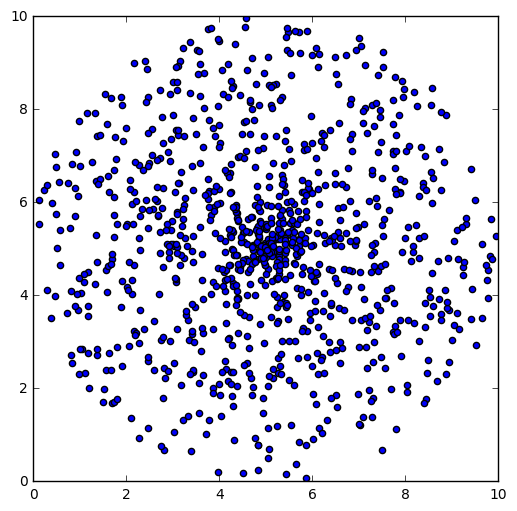

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
len(X)
plt.axis([0, 10, 0, 10])

In [4]:
X = []
Y=[]
for i in range(1000):
    x=random.randint(0,10)+random.random()
    y=random.randint(0,10)+random.random()
    if ((x-5)**2 + (y-5)**2) >25:
        print('Reject ({0},{1})'.format(x,y))
    else :
        X.append(x)
        Y.append(y)
print(len(X))        

Reject (10.039847057881644,10.860897756234401)
Reject (2.0697974086014708,0.39437390489280755)
Reject (6.237492498479351,10.28319685813096)
Reject (0.7424617230858668,1.5684099691740656)
Reject (8.395619342408168,8.67069278153579)
Reject (9.684115996010688,10.194308977595961)
Reject (1.7972623655682831,9.998576828057086)
Reject (9.274948600064112,10.742362561278838)
Reject (9.193850400146147,8.717517834514968)
Reject (10.127998577557294,10.78567554045994)
Reject (0.12422097755271222,6.974412152829109)
Reject (10.47511537957428,1.9282751551348642)
Reject (6.212497019384823,10.308168974986266)
Reject (9.68067634255941,3.169313693213681)
Reject (10.84858146893878,4.547830845947588)
Reject (2.759362496876794,10.841829245856331)
Reject (9.868633906542145,10.809556143504999)
Reject (10.775979743541127,10.95593628528601)
Reject (10.642867342176597,2.3852123658936732)
Reject (9.458686931239308,0.8849160398561124)
Reject (8.144801484660029,10.954722408064585)
Reject (7.160864386471151,10.560805

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

643


[0, 10, 0, 10]

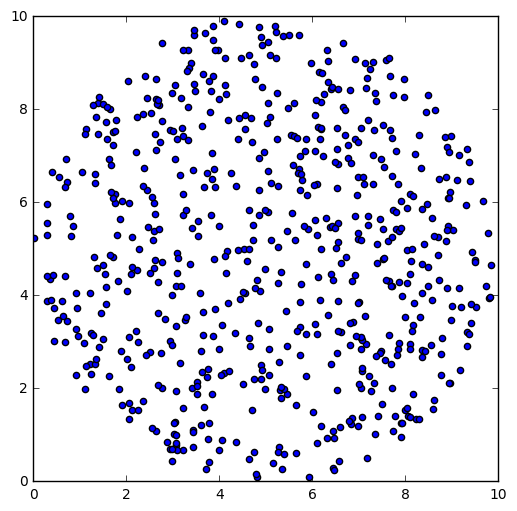

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
print(len(X))
plt.axis([0, 10, 0, 10])

# MH采样

In [10]:
import numpy as np
data = np.random.randn(200)
np.mean(data)

-0.011819193637129338

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


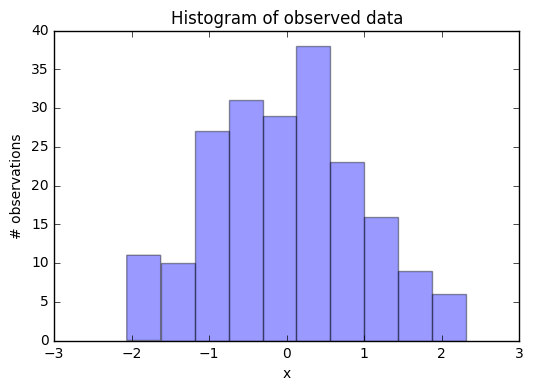

In [11]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

In [12]:
from scipy.stats import norm

In [13]:

def sampler(data, samples=100, mu_init=0.2, proposal_width=0.1, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        mu_proposal = norm(mu_current, proposal_width).rvs()


        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
   
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        

        p_accept = p_proposal / p_current
        

        accept = np.random.rand() < p_accept
        
     
        if accept:
            # Update position
            mu_current = mu_proposal
            posterior.append(mu_current)
        
        
        
    return posterior

In [14]:
sampler(data,samples=5)

[0.2,
 -0.002844612943885799,
 0.039299035919587076,
 0.0199347749450974,
 -0.02725698716299302]